# Task 2 for MIDAS Summer Internship

# Third Step

## Unzipping the Dataset

In [ ]:
!unzip "/content/drive/MyDrive/MIDASTask/mnistTask3.zip"

## Importing the Necessary Libraries

In [ ]:
pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=8c8ff1ea6461bf94f99ac13b7e7c493aa7c2be4d25599fef90582496290c9e23
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
import cv2
import os
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, MaxPool2D , Cropping2D
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Lambda
import idx2numpy
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Loading The Dataset
The Image Arrays and Labels are being loaded . The images are converted to grayscale and then resized to 40 x 40 . After that , the pixel values are divided by 255.0 .

In [ ]:
def LoadDataset():
  x_t = []
  y_t = []
  sample_path = "/content/mnistTask/"
  for i in range(0,10):
    folder = sample_path + str(i)
    images = []
    for filename in os.listdir(folder):
      img = cv2.imread(os.path.join(folder,filename))
      img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      data = Image.fromarray(img1)
      data = data.resize((40,40))
      data = image.img_to_array(data)
      x_t.append(data/255.0)
      y_t.append(i)
  x_t = np.array(x_t)
  y_t = np.array(y_t)
  return x_t,y_t

## Converting Into Categorical
The y labels are converted into Categorical values . 

In [ ]:
def ConvertToCategorical(y_):
  y_t = to_categorical(y_,num_classes=10, dtype = 'int')
  return y_t

## Splitting the Dataset
The dataset is being split into training and validation set

In [ ]:
def SplitDatasetIntoTrainAndValidationSet(x_t,y_t):
  x_train, x_valid, y_train, y_valid = train_test_split(x_t, y_t, test_size=0.2, random_state=0)
  return x_train, x_valid, y_train, y_valid


The following cells contains the execution of the functions mentioned above .

In [ ]:
x_t , y_t = LoadDataset()

In [ ]:
y_t = ConvertToCategorical(y_t)

In [ ]:
x_train, x_valid, y_train, y_valid = SplitDatasetIntoTrainAndValidationSet(x_t,y_t)
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)


(48000, 40, 40, 1) (48000, 10) (12000, 40, 40, 1) (12000, 10)


## Model Randomly initialised and then Trained

In [ ]:
model_random = Sequential()
model_random.add(Conv2D(16,(3,3),activation='relu',input_shape = (40,40,1)))
model_random.add(BatchNormalization())
model_random.add(MaxPool2D(2,2))

model_random.add(Conv2D(16,(3,3),activation='relu'))
model_random.add(BatchNormalization())
model_random.add(MaxPool2D(2,2))

model_random.add(Conv2D(32,(5,5),activation='relu'))
model_random.add(BatchNormalization())

model_random.add(Flatten())
model_random.add(Dense(128,activation ="relu"))
model_random.add(Dense(10,activation ="softmax"))

In [ ]:
model_random.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 38, 38, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 17, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          1

In [ ]:
model_random.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
path_model = 'Third_Step_Model_Random.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/MIDASTask/ThirdModelRandom/'+path_model, 
                             monitor = 'val_loss',
                             verbose=1, 
                             save_best_only=False,
                             mode= 'min')

In [ ]:
callbacks = [checkpoint]

In [ ]:
history_random = model_random.fit(x_train, y_train, batch_size = 512, epochs = 10,verbose = 2,validation_data = (x_valid, y_valid) , callbacks = callbacks)

Epoch 1/10
94/94 - 48s - loss: 2.3300 - accuracy: 0.1093 - val_loss: 2.3191 - val_accuracy: 0.1042

Epoch 00001: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelRandom/Third_Step_Model_Random.epoch01-loss2.32.hdf5
Epoch 2/10
94/94 - 47s - loss: 2.2582 - accuracy: 0.1208 - val_loss: 2.3413 - val_accuracy: 0.1054

Epoch 00002: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelRandom/Third_Step_Model_Random.epoch02-loss2.34.hdf5
Epoch 3/10
94/94 - 47s - loss: 2.2381 - accuracy: 0.1296 - val_loss: 2.3165 - val_accuracy: 0.1101

Epoch 00003: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelRandom/Third_Step_Model_Random.epoch03-loss2.32.hdf5
Epoch 4/10
94/94 - 47s - loss: 2.2231 - accuracy: 0.1350 - val_loss: 2.2894 - val_accuracy: 0.1125

Epoch 00004: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelRandom/Third_Step_Model_Random.epoch04-loss2.29.hdf5
Epoch 5/10
94/94 - 47s - loss: 2.2073 - accuracy: 0.1468 - val_loss: 2.2816 - val_accuracy: 0.1075



## Loading Pre-Trained Model . 

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/MIDASTask/FirstModel/First_Step_Model.epoch11-loss0.72.hdf5')

In [ ]:
loaded_model.pop()

In [ ]:
model_pretrain = Sequential()
model_pretrain.add(loaded_model)
model_pretrain.add(Dense(10,activation = 'softmax'))

In [ ]:
model_pretrain.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 128)               81232     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 82,522
Trainable params: 82,394
Non-trainable params: 128
_________________________________________________________________


In [ ]:
model_pretrain.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
path_model = 'Third_Step_Model_PreTrained.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/MIDASTask/ThirdModelPreTrained/'+path_model, 
                             monitor = 'val_loss',
                             verbose=1, 
                             save_best_only=False,
                             mode= 'min')

In [ ]:
callbacks = [checkpoint]

In [ ]:
history_pretrain = model_pretrain.fit(x_train, y_train, batch_size = 512, epochs = 10,verbose = 2,validation_data = (x_valid, y_valid), callbacks = callbacks )

Epoch 1/10
94/94 - 48s - loss: 2.4376 - accuracy: 0.1102 - val_loss: 2.3801 - val_accuracy: 0.1102

Epoch 00001: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelPreTrained/Third_Step_Model_PreTrained.epoch01-loss2.38.hdf5
Epoch 2/10
94/94 - 47s - loss: 2.2688 - accuracy: 0.1223 - val_loss: 2.3006 - val_accuracy: 0.1093

Epoch 00002: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelPreTrained/Third_Step_Model_PreTrained.epoch02-loss2.30.hdf5
Epoch 3/10
94/94 - 47s - loss: 2.2456 - accuracy: 0.1305 - val_loss: 2.2834 - val_accuracy: 0.1095

Epoch 00003: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelPreTrained/Third_Step_Model_PreTrained.epoch03-loss2.28.hdf5
Epoch 4/10
94/94 - 47s - loss: 2.2297 - accuracy: 0.1382 - val_loss: 2.2656 - val_accuracy: 0.1116

Epoch 00004: saving model to /content/drive/MyDrive/MIDASTask/ThirdModelPreTrained/Third_Step_Model_PreTrained.epoch04-loss2.27.hdf5
Epoch 5/10
94/94 - 47s - loss: 2.2169 - accuracy: 0.1440 - val_loss:

## Graphical Representaton of Loss and Accuracy of Train and Validation Set For PreTrained Model



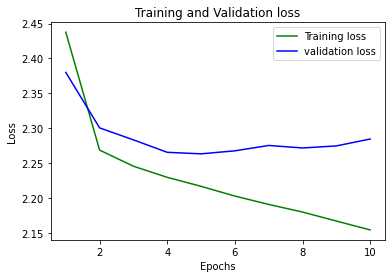

In [ ]:
loss_train = history_pretrain.history['loss']
loss_val = history_pretrain.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

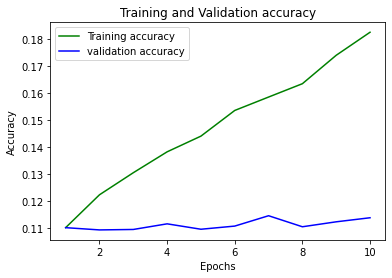

In [ ]:
loss_train = history_pretrain.history['accuracy']
loss_val = history_pretrain.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Graphical Representaton of Loss and Accuracy of Train and Validation Set For RandomlyInitialised Model

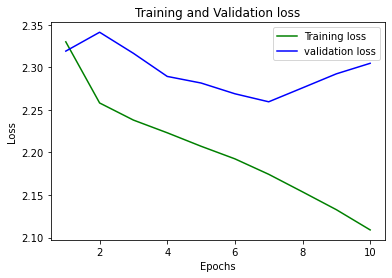

In [ ]:
loss_train = history_random.history['loss']
loss_val = history_random.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

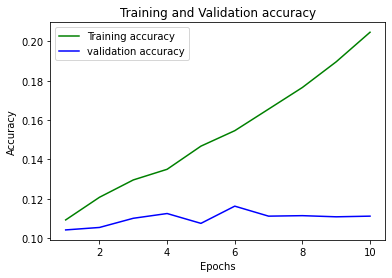

In [ ]:
loss_train = history_random.history['accuracy']
loss_val = history_random.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Uploading the Test Data

In [ ]:
file = '/content/drive/MyDrive/MIDASTask/t10k-images-idx3-ubyte'
x_te = idx2numpy.convert_from_file(file)

In [ ]:
file = '/content/drive/MyDrive/MIDASTask/t10k-labels.idx1-ubyte'
y_te = idx2numpy.convert_from_file(file)

In [ ]:
x_te.shape

(10000, 28, 28)

In [ ]:
y_te.shape

(10000,)

In [ ]:

x_test = []
for i in range(0,10000):
  img = x_te[i]
  res = cv2.resize(img, dsize=(40, 40), interpolation=cv2.INTER_CUBIC)
  data = image.img_to_array(res)
  x_test.append(data/255.0)

In [ ]:
x_test_final = np.array(x_test)

In [ ]:
y_te = np.array(y_te)


In [ ]:
y_test = to_categorical(y_te,num_classes=10, dtype = 'int')

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
print(x_test_final.shape, y_test.shape)

(10000, 40, 40, 1) (10000, 10)


## Comparing the Accuracy of the last epoch model of PreTrain and Randomly Initialised Model 

In [ ]:
model_pretrain_loaded = tf.keras.models.load_model('/content/drive/MyDrive/MIDASTask/ThirdModelPreTrained/Third_Step_Model_PreTrained.epoch10-loss2.28.hdf5')

In [ ]:
model_random_loaded = tf.keras.models.load_model('/content/drive/MyDrive/MIDASTask/ThirdModelRandom/Third_Step_Model_Random.epoch10-loss2.30.hdf5')

In [ ]:
Score_PreTrain_LastEpoch = model_pretrain_loaded.evaluate(x_test_final,y_test,verbose = 0)

In [ ]:
Score_Random_LastEpoch = model_random_loaded.evaluate(x_test_final,y_test,verbose=0)

In [ ]:
print("Accuracy of Last Epoch of Pre-Trained Models is :", Score_PreTrain_LastEpoch[1])

Accuracy of Last Epoch of Pre-Trained Models is : 0.0007999999797903001


In [ ]:
print("Accuracy of Last Epoch of Randomly Initialised Models is :", Score_Random_LastEpoch[1])

Accuracy of Last Epoch of Randomly Initialised Models is : 0.0012000000569969416


## Calculating the Precision and Recall of PreTrain Model

In [ ]:
y_pred_pretrain = model_pretrain_loaded.predict(x_test_final)

In [ ]:
y_pred_final_pretrain = np.zeros_like(y_pred_pretrain)
y_pred_final_pretrain[np.arange(len(y_pred_pretrain)), y_pred_pretrain.argmax(1)] = 1
y_pred_final_pretrain = y_pred_final_pretrain.astype(int)

In [ ]:
precision_pretrain = precision_score(y_pred_final_pretrain, y_test,average = 'weighted')

In [ ]:
print(precision_pretrain)

0.0009790434909767822


In [ ]:
recall_pretrain = recall_score(y_pred_final_pretrain, y_test,average = 'weighted')

In [ ]:
print(recall_pretrain)

0.0008


## Calculating the Precision and Recall of Randomly Initialised Model

In [ ]:
y_pred_random = model_random_loaded.predict(x_test_final)

In [ ]:
y_pred_final_random = np.zeros_like(y_pred_random)
y_pred_final_random[np.arange(len(y_pred_random)), y_pred_random.argmax(1)] = int(1)
y_pred_final_random = y_pred_final_random.astype(int)

In [ ]:
precision_random = precision_score(y_pred_final_random, y_test, average = 'weighted')

In [ ]:
print(precision_random)

0.0014090543714025219


In [ ]:
recall_random = recall_score(y_pred_final_random, y_test, average = 'weighted')

In [ ]:
print(recall_random)

0.0012


## Comparision between Pretrain and Randomly Initialised Model

<table>
  <tr>
    <th>Evaluation Metric</th>
    <th>Pre-Trained Model</th>
    <th>Randomly Initialised Model</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.079%</td>
    <td>0.12%</td>
  </tr>
  <tr>
    <td>Precision (Average = Weighted) </td>
    <td>0.097%</td>
    <td>0.14%</td>
  </tr>
  <tr>
    <td>Recall (Average = Weighted)</td>
    <td>0.08%</td>
    <td>0.12%</td>
  </tr>
</table>




## Inference
<ul>
<li>The Accuracy of both the models were very low ,i.e., < 1% . It was because there was a lot of noise in the dataset. That means that , if the label was 0, there were very few images which was actually 0. Moreover, The test set contain images which were actually mapped with their correct labels. Therefore the model learnt on some different type of dataset and was tested on a different type of dataset .</li>
<li>We have calculated the  Precision (Average = weighted) , which meant the precision was calculated by taking the precision of each class and then taking the average supported by weights . The precision of Randomly Initialised model was higher than Pre-Trained Model which meant that it could predict more number of positive identification which were actually correct . </li>
<li>We have also calculated the  Recall (Average = weighted) , which meant the recall was calculated by taking the recall of each class and then taking the average supported by weights . The recall of Randomly Initialised model was also higher than Pre-Trained Model which meant that more number of actual positives were identified correctly . </li>
<li>Atlast , what I have observed is that the Randomly Initialised Model performs slightly better than a Pre-Trained Model on a dataset with a very high amount of noise , provided the Pre-Trained was earlier trained on a different type of dataset .</li>